# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_response = requests.get(city_url)

    try:
        # Parse the JSON and retrieve data
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lihue
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | magadan
Processing Record 7 of Set 1 | lubao
Processing Record 8 of Set 1 | juneau
Processing Record 9 of Set 1 | kulia village
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | khovd
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | minas de marcona
Processing Record 15 of Set 1 | manavalakurichi
Processing Record 16 of Set 1 | yanchep
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | tralee
Processing Record 20 of Set 1 | kerikeri
Processing Record 21 of Set 1 | rabaul
Processing Record 22 of Set 1 | margar

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lihue,21.9789,-159.3672,26.77,72,0,6.69,US,1720241177
1,olonkinbyen,70.9221,-8.7187,1.40,93,100,5.02,SJ,1720241249
2,bredasdorp,-34.5322,20.0403,8.01,77,100,2.22,ZA,1720241250
3,puerto natales,-51.7236,-72.4875,-6.51,90,36,1.39,CL,1720241251
4,ushuaia,-54.8000,-68.3000,-2.19,86,75,2.57,AR,1720241252


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,26.77,72,0,6.69,US,1720241177
1,olonkinbyen,70.9221,-8.7187,1.40,93,100,5.02,SJ,1720241249
2,bredasdorp,-34.5322,20.0403,8.01,77,100,2.22,ZA,1720241250
3,puerto natales,-51.7236,-72.4875,-6.51,90,36,1.39,CL,1720241251
4,ushuaia,-54.8000,-68.3000,-2.19,86,75,2.57,AR,1720241252


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

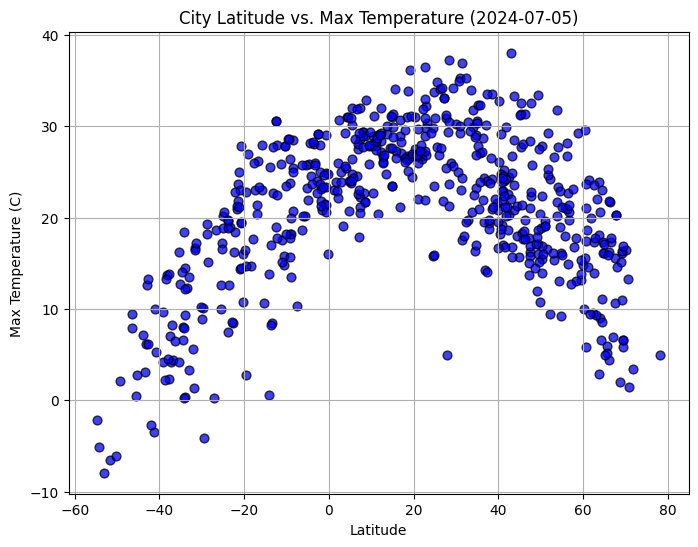

In [10]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
temp_scatter = city_data_df.plot(kind="scatter", x='Lat', y='Max Temp', title = "City Latitude vs. Max Temperature (2024-07-05)", xlabel = "Latitude", grid=True,
                          ylabel = "Max Temperature (C)", marker = 'o', color='b', alpha=0.75, edgecolors='black', s=40, figsize=(8, 6))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

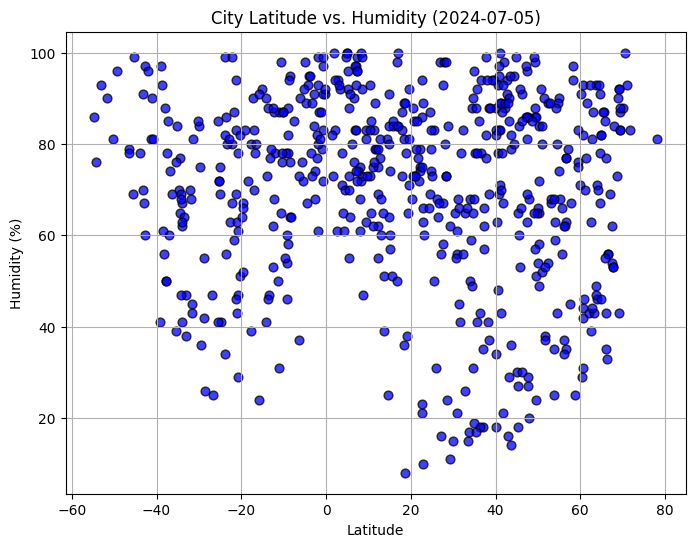

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
humidity_scatter = city_data_df.plot(kind="scatter", x='Lat', y='Humidity', title = "City Latitude vs. Humidity (2024-07-05)", xlabel = "Latitude", grid=True,
                          ylabel = "Humidity (%)", marker = 'o', color='b', alpha=0.75, edgecolors='black', s=40, figsize=(8, 6))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

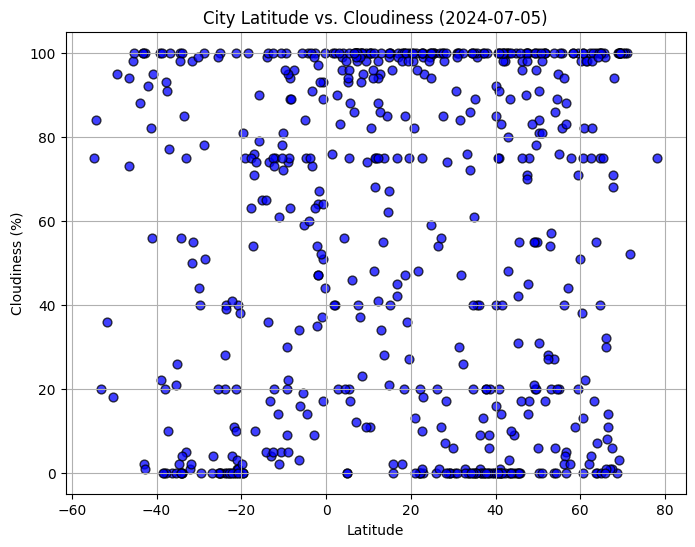

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
cloud_scatter = city_data_df.plot(kind="scatter", x='Lat', y='Cloudiness', title = "City Latitude vs. Cloudiness (2024-07-05)", xlabel = "Latitude", grid=True,
                          ylabel = "Cloudiness (%)", marker = 'o', color='b', alpha=0.75, edgecolors='black', s=40, figsize=(8, 6))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

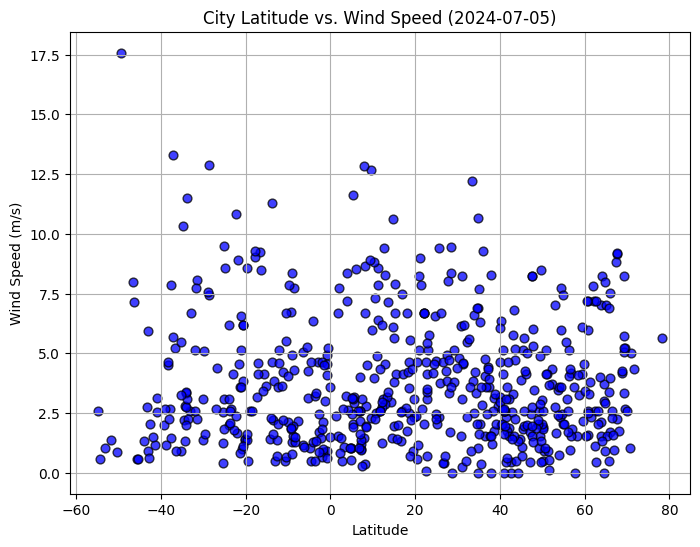

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,26.77,72,0,6.69,US,1720241177
1,olonkinbyen,70.9221,-8.7187,1.40,93,100,5.02,SJ,1720241249
2,bredasdorp,-34.5322,20.0403,8.01,77,100,2.22,ZA,1720241250
3,puerto natales,-51.7236,-72.4875,-6.51,90,36,1.39,CL,1720241251
4,ushuaia,-54.8000,-68.3000,-2.19,86,75,2.57,AR,1720241252


In [13]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

wind_scatter = city_data_df.plot(kind="scatter", x='Lat', y= 'Wind Speed', title = "City Latitude vs. Wind Speed (2024-07-05)", xlabel = "Latitude", grid=True,
                          ylabel = "Wind Speed (m/s)", marker = 'o', color='b', alpha=0.75, edgecolors='black', s=40, figsize=(8, 6))


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()
city_data_df.head()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, xlabel='', ylabel='', title=''):
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', label='Data points')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,(min(x_data)+5,min(y_data)+5),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()
      


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lihue,21.9789,-159.3672,26.77,72,0,6.69,US,1720241177
1,olonkinbyen,70.9221,-8.7187,1.40,93,100,5.02,SJ,1720241249
5,magadan,59.5667,150.8000,13.15,83,100,2.15,RU,1720240975
6,lubao,14.9167,120.5500,31.04,64,67,1.96,PH,1720241255
7,juneau,58.3019,-134.4197,13.00,94,100,1.54,US,1720240982


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,8.01,77,100,2.22,ZA,1720241250
3,puerto natales,-51.7236,-72.4875,-6.51,90,36,1.39,CL,1720241251
4,ushuaia,-54.8000,-68.3000,-2.19,86,75,2.57,AR,1720241252
8,puerto ayora,-0.7393,-90.3518,21.42,97,17,0.89,EC,1720241258
11,invercargill,-46.4000,168.3500,9.45,79,94,7.15,NZ,1720241262


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.613801274891622
The r-squared value is: 0.3767520050585805


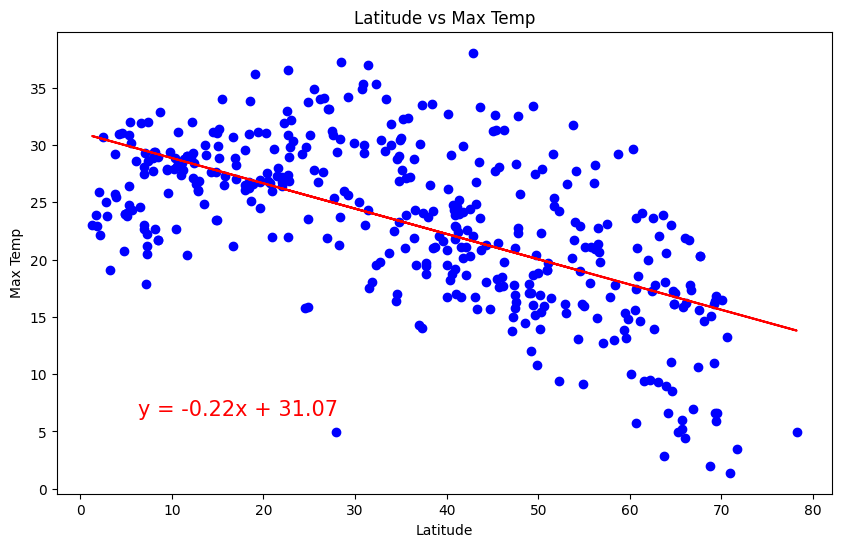

In [28]:
# Linear regression on Northern Hemisphere

x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Max Temp']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Max Temp', title='Latitude vs Max Temp')

The r-value is: 0.7775599019517835
The r-squared value is: 0.6045994011232672


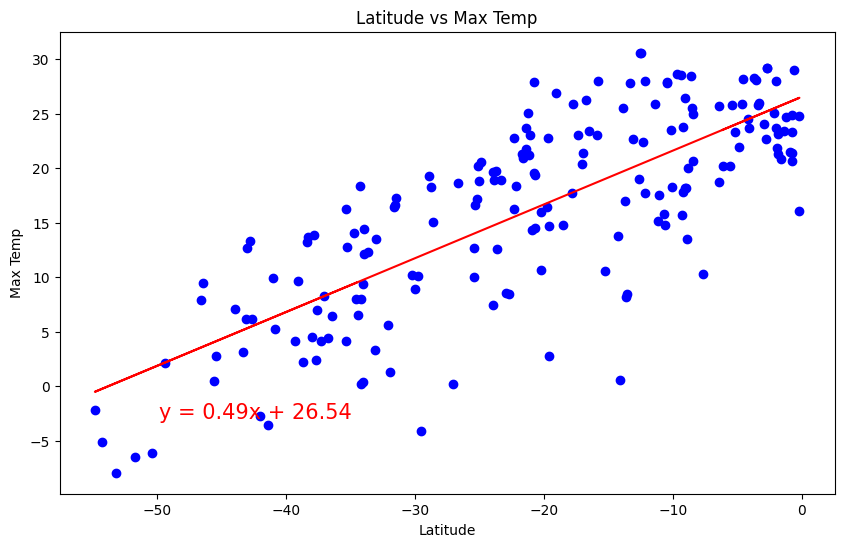

In [29]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Max Temp']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Max Temp', title='Latitude vs Max Temp')

**Discussion about the Temperature vs. Latitude linear relationship:** 
* For Northern Hemisphere, there is a fairly strong negative correlation between temperature and latitude with a correlation coefficient of -0.613801274891622. 
* For Southern Hemisphere, there is a relatively strong positive correlation between temperature and latitude with a correlation coefficient of 0.7775599019517835. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.13209272868817812
The r-squared value is: 0.017448488972288633


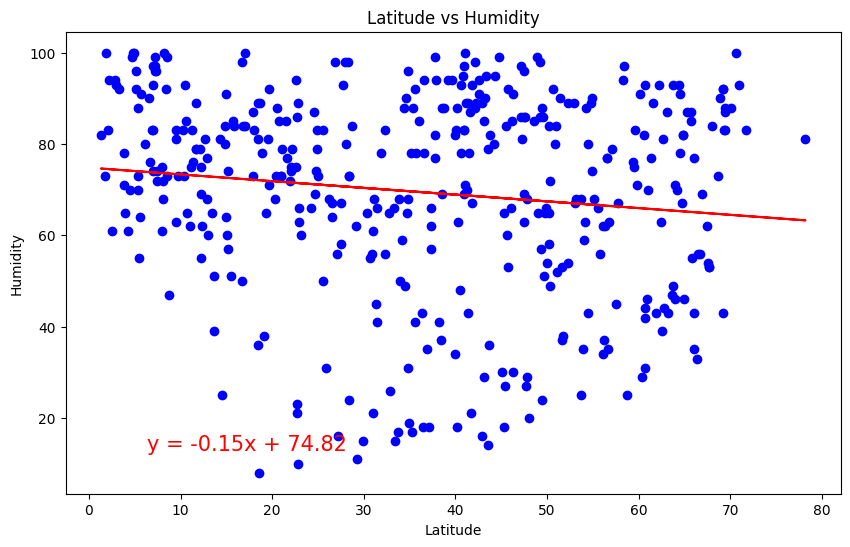

In [30]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Humidity']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Humidity', title='Latitude vs Humidity')

The r-value is: 0.1357053089957225
The r-squared value is: 0.018415930889624524


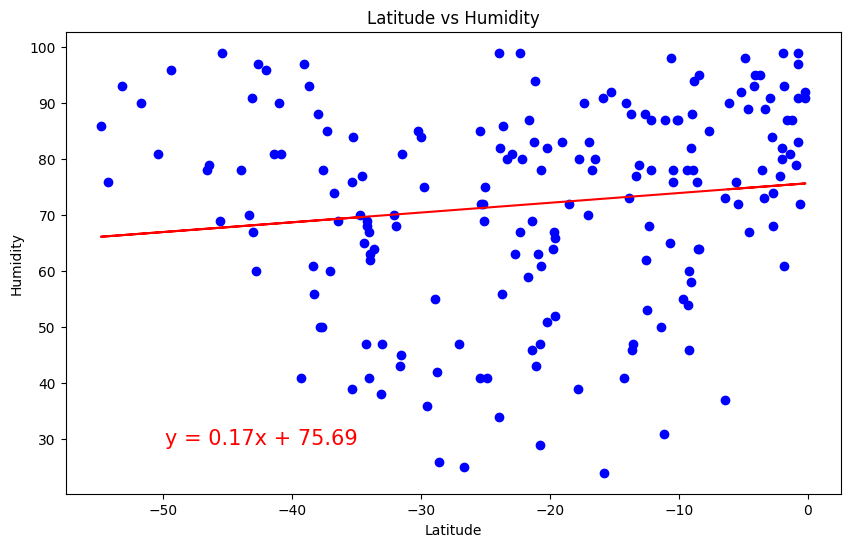

In [31]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Humidity']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Humidity', title='Latitude vs Humidity')

**Discussion about the Humidity vs. Latitude linear relationship:** 
* For Northern Hemisphere, there is a very small negative correlation between humidity and latitude with a correlation coefficient of -0.13209272868817812, it almost indicates there is no correlation.
* For Southern Hemisphere, there is a very small positive correlation between humidity and latitude with a correlation coefficient of 0.1357053089957225, it almost indicates there is no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1342156999984115
The r-squared value is: 0.018013854126063593


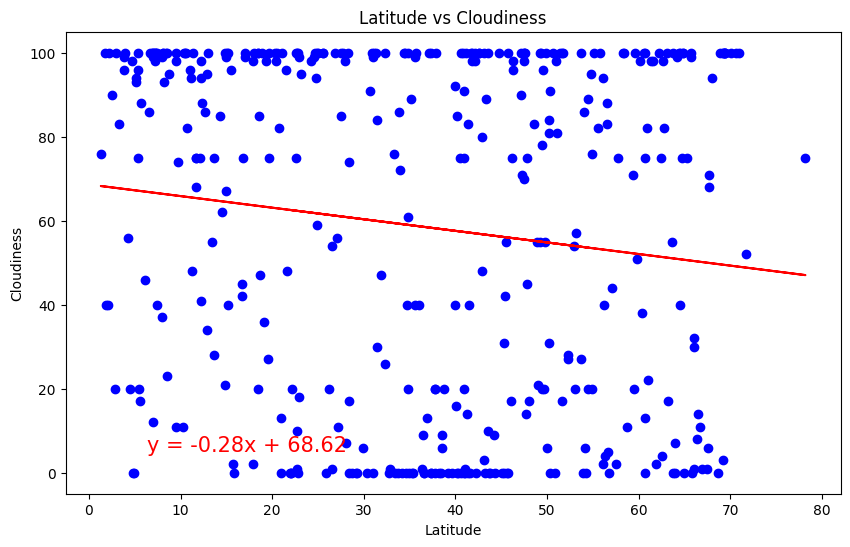

In [32]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Cloudiness']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Cloudiness', title='Latitude vs Cloudiness')

The r-value is: 0.08270565798427507
The r-squared value is: 0.006840225862611882


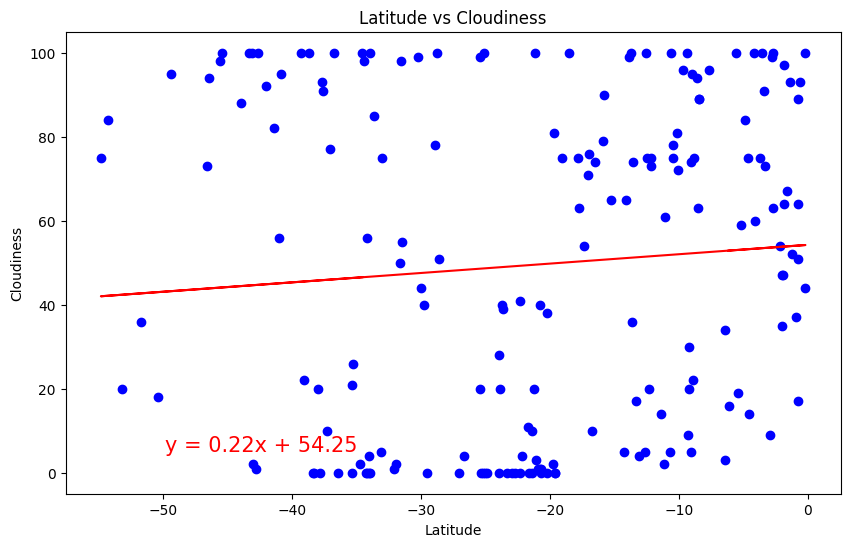

In [33]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Cloudiness']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Cloudiness', title='Latitude vs Cloudiness')

**Discussion about the Cloudiness vs. Latitude linear relationship:** 
* For Northern Hemisphere, there is a very small negative correlation between cloudiness and latitude with a correlation coefficient of -0.1342156999984115, it almost indicates there is no correlation.
* For Southern Hemisphere, there is a very small positive correlation between cloudiness and latitude with a correlation coefficient of 0.08270565798427507, it almost indicates there is no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.06290931832229797
The r-squared value is: 0.003957582331776215


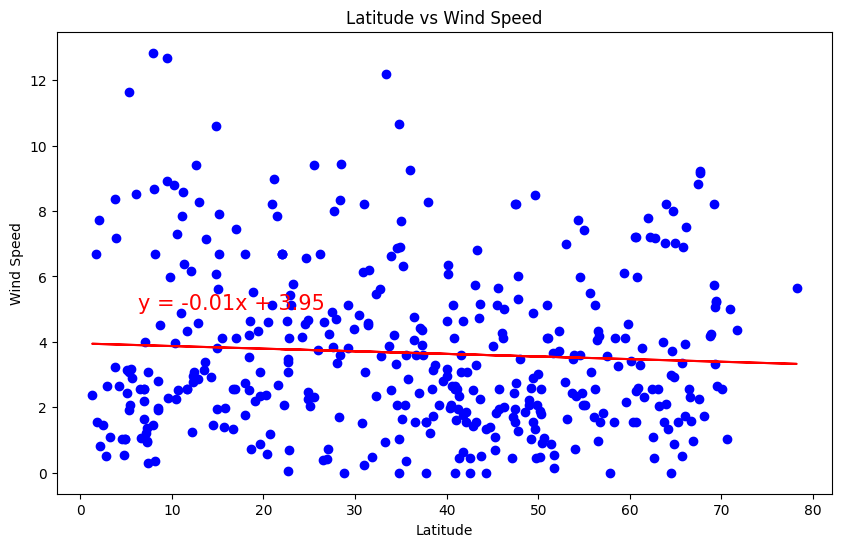

In [34]:
# Northern Hemisphere
x_data = northern_hemi_df['Lat']
y_data = northern_hemi_df['Wind Speed']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Wind Speed', title='Latitude vs Wind Speed')

The r-value is: -0.09949286688750741
The r-squared value is: 0.00989883056149527


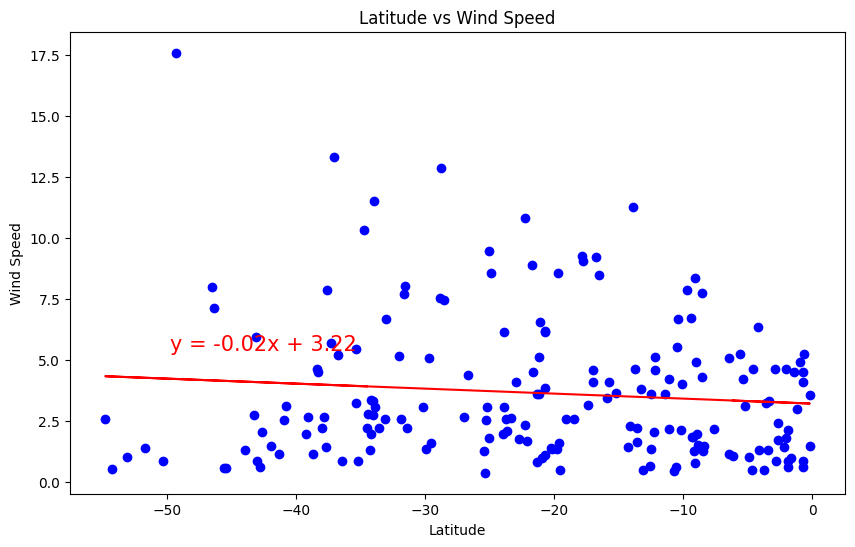

In [35]:
# Southern Hemisphere
x_data = southern_hemi_df['Lat']
y_data = southern_hemi_df['Wind Speed']
create_linear_regression_plot(x_data, y_data, xlabel='Latitude', ylabel='Wind Speed', title='Latitude vs Wind Speed')

**Discussion about the Wind Speed vs. Latitude linear relationship:** 
* For Northern Hemisphere, there is a very small negative correlation between wind speed and latitude with a correlation coefficient of -0.06290931832229797, it almost indicates there is no correlation.
* For Southern Hemisphere, there is a very small negative correlation between wind speed and latitude with a correlation coefficient of -0.09949286688750741, it almost indicates there is no correlation.